In [0]:
%matplotlib inline

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim

In [0]:
# Calling our modules
import Utils
import Model
import Model_train
import Model_test

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     #transforms.RandomHorizontalFlip(),
     #transforms.RandomCrop(32, padding=4),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


  dog   dog  ship   dog


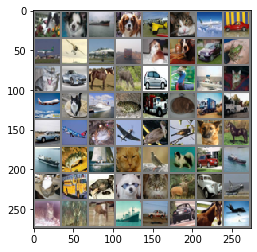

In [5]:


# functions to show an image


# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
#imshow(torchvision.utils.make_grid(images))
Utils.imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          36,864
       BatchNorm2d-6          [-1, 128, 32, 32]             256
              ReLU-7          [-1, 128, 32, 32]               0
         Dropout2d-8          [-1, 128, 32, 32]               0
         MaxPool2d-9          [-1, 128, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]           4,096
           Conv2d-11           [-1, 64, 16, 16]          18,432
      BatchNorm2d-12           [-1, 64, 16, 16]             128
             ReLU-13           [-1, 64, 16, 16]               0
        Dropout2d-14           [-1

In [0]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [0]:
def model_call(model, device, trainloader, optimizer,testloader, epoch):

  Model_train.train(model, device, trainloader, optimizer, epoch, train_losses, train_acc)
  scheduler.step()
  Model_test.test(model, device, testloader, test_losses, test_acc)

In [12]:
model =  Model.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
EPOCHS = 1


for epoch in range(EPOCHS):
  print("EPOCH:", epoch+1)
  model_call(model, device, trainloader, optimizer,testloader, epoch)

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.150092601776123 Batch_id=781 Accuracy=48.11: 100%|██████████| 782/782 [00:18<00:00, 41.92it/s]



Test set: Average loss: 1.0637, Accuracy: 6268/10000 (62.68%)



GroundTruth:   bird  frog  bird plane


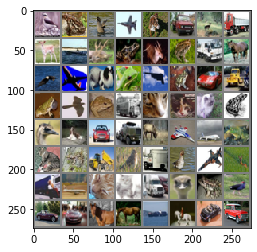

In [13]:
xdataiter = iter(testloader)
images, labels = dataiter.next()

Utils.imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
out_imag =[]
for i, data in enumerate(testloader, 0):
        # get the inputs
        out_imag = data[0].to(device)
outputs = model(out_imag)


_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse   cat  ship plane


In [15]:
import Utils
# Printing total accuracy
Utils.total_accuracy(testloader,model,device)

Accuracy of the network on the 10000 test images: 62 %


In [16]:
# Printing classwise accuracy
Utils.class_accuracy(testloader, model,device)    

Accuracy of plane : 67 %
Accuracy of   car : 90 %
Accuracy of  bird : 56 %
Accuracy of   cat : 19 %
Accuracy of  deer : 43 %
Accuracy of   dog : 52 %
Accuracy of  frog : 62 %
Accuracy of horse : 84 %
Accuracy of  ship : 70 %
Accuracy of truck : 64 %
